In [121]:
pip install --q pingouin

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

#import pingouin as pg

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_diamonds = sns.load_dataset("diamonds")

In [4]:
df_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


carat: The weight of the diamond, equivalent to 200mg (should be a good indicator)

cut: Quality of the cut

color: Color of the diamond from J to D (worst to best)

clarity: How clear the diamond is; I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

depth: Total depth percentage (relative to x and y). Will likely be collinear.

table: Width of top of diamond relative to widest point (43--95)

price: In US dollars ($)

x, y, z: Dimensions of the diamond

In [5]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df_diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df_diamonds.describe(include = ["O"])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


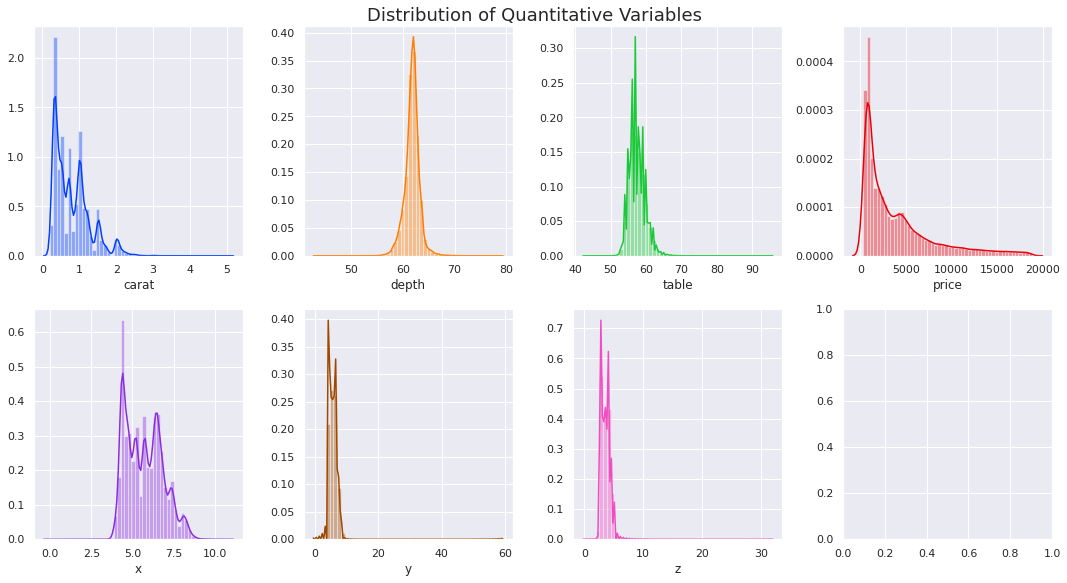

In [10]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig , axes = plt.subplots(2, 4, figsize = (15,8))

sns.distplot(df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.distplot(df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.distplot(df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.distplot(df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.distplot(df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.distplot(df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.distplot(df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y = 1.01, size = 18)
plt.tight_layout()
plt.show()

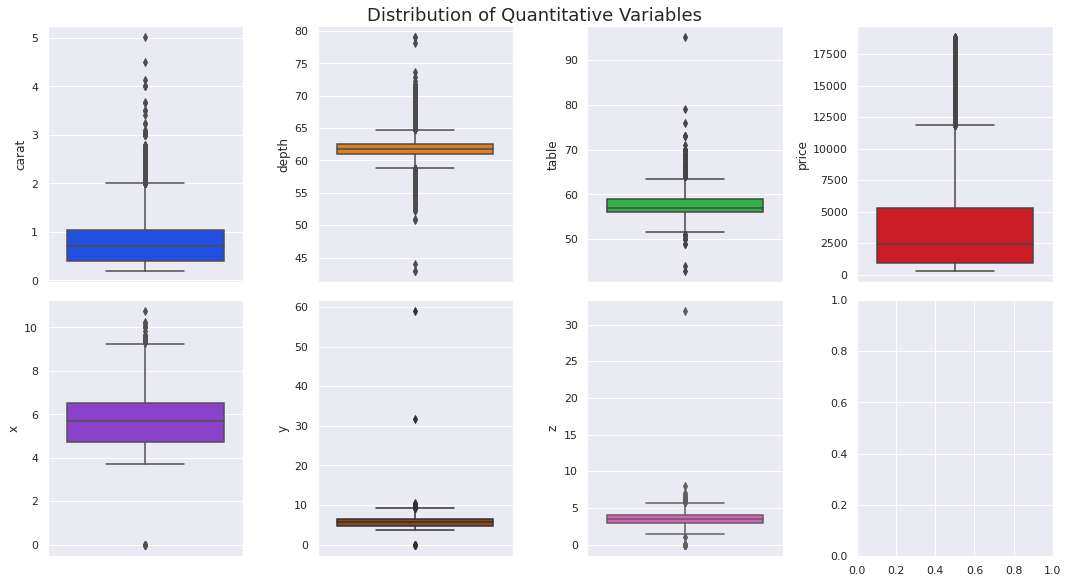

In [12]:
sns.set(color_codes=True)
colors = sns.color_palette("bright")

fig , axes = plt.subplots(2, 4, figsize = (15,8))

sns.boxplot(y=df_diamonds["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y=df_diamonds["depth"], color = colors[1], ax = axes[0,1])
sns.boxplot(y=df_diamonds["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y=df_diamonds["price"], color = colors[3], ax = axes[0,3])
sns.boxplot(y=df_diamonds["x"], color = colors[4], ax = axes[1,0])
sns.boxplot(y=df_diamonds["y"], color = colors[5], ax = axes[1,1])
sns.boxplot(y=df_diamonds["z"], color = colors[6], ax = axes[1,2])

plt.suptitle("Distribution of Quantitative Variables", y = 1.01, size = 18)
plt.tight_layout()
plt.show()

In [15]:
weird_zeros = df_diamonds[(df_diamonds["x"] == 0) | (df_diamonds["y"] == 0) | (df_diamonds["z"] == 0)]

In [20]:
all_zeros = df_diamonds[(df_diamonds["x"] == 0) & (df_diamonds["y"] == 0) & (df_diamonds["z"] == 0)]

In [21]:
all_zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [16]:
weird_zeros.shape

(20, 10)

In [17]:
weird_zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [59]:
df_diamondsX = df_diamonds.copy()

In [60]:
df_diamondsX = df_diamonds.copy()
df_diamondsX = df_diamondsX[~df_diamondsX.isin(weird_zeros)].dropna(how = "all")

In [42]:
df_diamondsX.shape

(53920, 10)

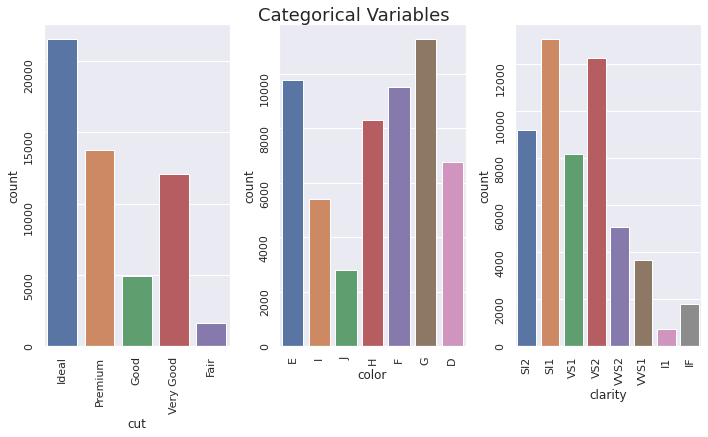

In [25]:
sns.set(color_codes=True)

colors = sns.color_palette("bright")

fig, axes = plt.subplots(1, 3, figsize = (10,6))

sns.countplot("cut", data = df_diamondsX, ax = axes[0])
sns.countplot("color", data = df_diamondsX, ax = axes[1])
sns.countplot("clarity", data = df_diamondsX, ax = axes[2])

#quick for loop to adjust all axes at once
for ax in fig.axes:
  ax.tick_params(labelrotation=90)

plt.suptitle("Categorical Variables", y= 1.01, size = 18)
plt.tight_layout()
plt.show()

In [27]:
new_cols = pd.get_dummies(df_diamondsX["cut"])
new_cols

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
53935,0,0,1,0,0
53936,0,1,0,0,0
53937,0,0,0,0,1
53938,0,0,0,1,0


In [61]:
df_diamondsX = df_diamondsX.drop(["color","clarity","cut"], axis = 1)

In [62]:
df_diamondsX

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


In [63]:
df = pd.concat([df_diamondsX, new_cols], axis = 1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53920 non-null  float64
 1   depth      53920 non-null  float64
 2   table      53920 non-null  float64
 3   price      53920 non-null  float64
 4   x          53920 non-null  float64
 5   y          53920 non-null  float64
 6   z          53920 non-null  float64
 7   Fair       53920 non-null  uint8  
 8   Good       53920 non-null  uint8  
 9   Ideal      53920 non-null  uint8  
 10  Premium    53920 non-null  uint8  
 11  Very Good  53920 non-null  uint8  
dtypes: float64(7), uint8(5)
memory usage: 3.5 MB


In [66]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 32)

In [67]:
Y_test = test_df["price"]

X_test = test_df.drop(columns = ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns = ["price"], axis = 1)

In [68]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 32)

Y_test = test_df["price"]

X_test = test_df.drop(columns = ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns = ["price"], axis = 1)

def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [69]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(linear_regression.intercept_)

10181.915587138057


In [71]:
print(linear_regression.coef_)

[ 1.08607980e+04 -8.47180814e+01 -4.47995132e+01 -9.32136938e+02
  8.58589044e+01 -7.16093794e+02 -9.69989981e+02  7.02304221e+00
  4.72284373e+02  2.09546016e+02  2.81136549e+02]


In [72]:
Y_pred_linear = linear_regression.predict(X_test)

In [73]:
Y_pred_linear

array([3275.45726279,  736.6651985 , 4108.88179593, ..., 4087.19966186,
       3003.15922589,  276.18091793])

In [74]:
linear_comparison = pd.DataFrame({"Actual":Y_test, "Predicted":Y_pred_linear})

In [75]:
linear_comparison

,Actual,Predicted
870,2872.0,3275.457263
30111,720.0,736.665199
7191,4187.0,4108.881796
2152,3127.0,3399.928777
1612,3012.0,3344.339693
...,...,...
46361,1760.0,2218.596421
15399,6169.0,5943.141659
51624,2396.0,4087.199662
46355,1760.0,3003.159226


In [76]:
error_metrics(Y_test, Y_pred_linear)

('Mean Absolute Error: 868.7838263415149',
 'Mean Square Error: 2128771.9965016185',
 'r2 score: 0.866465760180393')

In [77]:
linear_comparison["Diff"] = np.abs(linear_comparison["Actual"] - linear_comparison["Predicted"])

In [78]:
linear_comparison.head(5)

,Actual,Predicted,Diff
870,2872.0,3275.457263,403.457263
30111,720.0,736.665199,16.665199
7191,4187.0,4108.881796,78.118204
2152,3127.0,3399.928777,272.928777
1612,3012.0,3344.339693,332.339693


In [79]:
linear_comparison["Dist100"] = ["Yes" if x <= 100.00 else "No" for x in linear_comparison["Diff"]]

linear_comparison["Dist500"] = ["Yes" if x <= 500.00 else "No" for x in linear_comparison["Diff"]]

In [80]:
linear_comparison.head(5)

,Actual,Predicted,Diff,Dist100,Dist500
870,2872.0,3275.457263,403.457263,No,Yes
30111,720.0,736.665199,16.665199,Yes,Yes
7191,4187.0,4108.881796,78.118204,Yes,Yes
2152,3127.0,3399.928777,272.928777,No,Yes
1612,3012.0,3344.339693,332.339693,No,Yes


In [81]:
linear_comparison["Dist100"].value_counts()

No     13982
Yes     2194
Name: Dist100, dtype: int64

In [82]:
2194/(13982+2194)

0.13563303659742829

In [83]:
linear_comparison["Dist500"].value_counts()

Yes    8549
No     7627
Name: Dist500, dtype: int64

In [84]:
8549/(8549+7627)

0.5284990108803165

In [88]:
#statsmodels version
model_linear = sm.OLS(Y_train, X_train)
linear_stats_model = model_linear.fit()
print(linear_stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 2.326e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:52:06   Log-Likelihood:            -3.2930e+05
No. Observations:               37744   AIC:                         6.586e+05
Df Residuals:                   37733   BIC:                         6.587e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       1.086e+04     80.207    135.410      0.0

In [89]:
linear_ping = pg.linear_regression(X_train[["x","y","z"]], Y_train)
linear_ping

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-14194.266287,49.514073,-286.671352,0.000000e+00,0.786796,0.786779,-14291.315199,-14097.217374
1,x,2541.628533,64.601138,39.343402,0.000000e+00,0.786796,0.786779,2415.008569,2668.248497
2,y,83.975036,32.279599,2.601489,9.285614e-03,0.786796,0.786779,20.706156,147.243916
3,z,869.335212,102.839365,8.453331,2.931102e-17,0.786796,0.786779,667.767295,1070.903128


In [92]:
rng = np.random.RandomState(1)

x = 7 * rng.rand(50)

y = np.sin(x) + 0.3 * rng.randn(50)

In [93]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

inds = x.ravel().argsort()
x = x.ravel()[inds].reshape(-1,1)
y = y[inds]

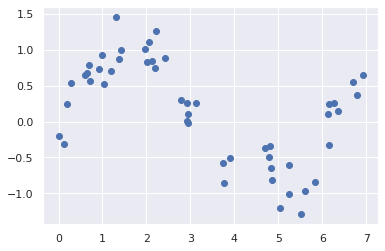

In [94]:
sns.set(color_codes=True)
plt.scatter(x,y)
plt.show()

In [95]:
model = sm.OLS(y,x).fit()

In [96]:
y_pred = model.predict(x)

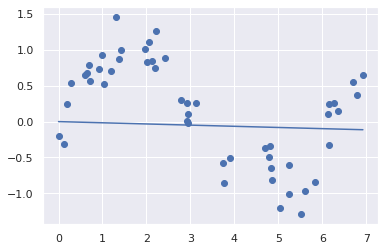

In [97]:
plt.scatter(x,y)
plt.plot(x, y_pred)
plt.show()

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
poly_feat = PolynomialFeatures(degree = 5)
xp5 = poly_feat.fit_transform(x)
xp5.shape

(50, 6)

In [106]:
model = sm.OLS(y, xp5).fit()
y_pred = model.predict(xp5)

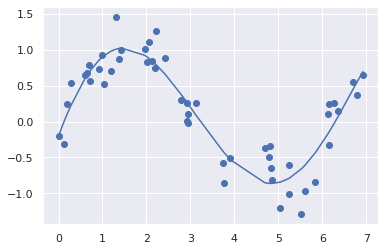

In [107]:
plt.scatter(x,y)
plt.plot(x, y_pred)
plt.show()

In [108]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     52.38
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           2.01e-17
Time:                        01:06:05   Log-Likelihood:                -4.1724
No. Observations:                  50   AIC:                             20.34
Df Residuals:                      44   BIC:                             31.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2000      0.186     -1.078      0.2

In [9]:
#data processing to keep our data set consistent
df_diamonds=sns.load_dataset("diamonds")
weird_zeros = df_diamonds[(df_diamonds["x"] == 0) | (df_diamonds["y"] == 0) | (df_diamonds["z"] == 0)]

df_diamondsX = df_diamonds.copy()
df_diamondsX = df_diamondsX[~df_diamondsX.isin(weird_zeros)].dropna(how = "all")

new_cols = pd.get_dummies(df_diamondsX["cut"])
df_diamondsX = df_diamondsX.drop(["color","clarity","cut"], axis = 1)

df = pd.concat([df_diamondsX, new_cols], axis = 1)

In [10]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 32)

Y_test = test_df["price"]

X_test = test_df.drop(columns = ["price"], axis = 1)

Y_train = train_df["price"]

X_train = train_df.drop(columns = ["price"], axis = 1)

In [4]:
def error_metrics(y_true, y_pred):
    mean_abs = "Mean Absolute Error: {}".format(mean_absolute_error(y_true, y_pred))
    mean_squared = "Mean Square Error: {}".format(mean_squared_error(y_true, y_pred))
    r2 = "r2 score: {}".format(r2_score(y_true, y_pred))
    return mean_abs, mean_squared, r2

In [5]:
#common alpha for ridge
alphas = [.01, .1, 1, 10, 100, 1000, 10000]

In [6]:
ridge = RidgeCV(alphas = alphas, cv = 5)
ridge_fit = ridge.fit(X_train, Y_train)

In [7]:
yhat_ridge = ridge_fit.predict(X_test)

In [8]:
error_metrics(Y_test, yhat_ridge)

('Mean Absolute Error: 869.4967618952667',
 'Mean Square Error: 2128126.7148375013',
 'r2 score: 0.8665062375995948')

In [9]:
#work with Lasso

In [10]:
#common alpha for Lasso
alphas = [.01, .1, 1, 10, 100, 1000, 10000]

In [11]:
lasso = LassoCV(cv = 5, random_state=32, alphas=alphas)

In [12]:
lasso_fit = lasso.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 959025705.0725098, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328808282.0624466, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78050380.91799164, tolerance: 47473081.168359995
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

In [13]:
yhat_lasso = lasso_fit.predict(X_test)

In [14]:
error_metrics(Y_test, yhat_lasso)

('Mean Absolute Error: 871.9130601867238',
 'Mean Square Error: 2108582.232978879',
 'r2 score: 0.867732229641931')

In [15]:
error_metrics(Y_test, yhat_ridge)

('Mean Absolute Error: 869.4967618952667',
 'Mean Square Error: 2128126.7148375013',
 'r2 score: 0.8665062375995948')

In [16]:
lasso_ridge_comp = pd.DataFrame({"Actual":Y_test, "Pred Lasso": yhat_lasso, "Pred Ridge":yhat_ridge})

In [17]:
lasso_ridge_comp["Diff"] = np.abs(lasso_ridge_comp["Pred Lasso"] - lasso_ridge_comp["Pred Ridge"])

In [18]:
lasso_ridge_comp.describe()

,Actual,Pred Lasso,Pred Ridge,Diff
count,16176.000000,16176.000000,16176.000000,16176.000000
mean,3932.071464,3935.855112,3935.166396,12.635466
std,3992.837903,3706.921768,3713.114919,94.328151
min,337.000000,-6609.711477,-18454.037151,0.004716
25%,945.000000,926.791231,929.523984,4.967043
50%,2415.500000,2945.765004,2934.398999,9.110938
75%,5290.000000,5668.376598,5660.275746,14.779410
max,18803.000000,36255.726041,36382.286588,11844.325675


In [19]:
#common alpha for Lasso
alphas = [.01, .1, 1, 10, 100, 1000, 10000]

In [20]:
elasticnet = ElasticNetCV(cv = 5, random_state= 32, l1_ratio= 0.9, alphas=alphas)
elastic_fit = elasticnet.fit(X_train, Y_train)
yhat_elastic = elastic_fit.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4897307126.02887, tolerance: 48333020.23034175
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11086671409.410534, tolerance: 47473081.168359995
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9316816174.689281, tolerance: 48090730.86859131
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incre

In [21]:
error_metrics(Y_test, yhat_elastic)

('Mean Absolute Error: 896.9745801797305',
 'Mean Square Error: 2128610.652327314',
 'r2 score: 0.8664758810255095')

In [34]:
rf = RandomForestRegressor(n_estimators= 1000, random_state= 32)

In [35]:
rf_fit = rf.fit(X_train, Y_train)

In [32]:
yhat_rf = rf_fit.predict(X_test)

In [36]:
#1000
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 801.0787193301121',
 'Mean Square Error: 1992114.4473270096',
 'r2 score: 0.8750380553696528')

In [33]:
#10
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 801.0787193301121',
 'Mean Square Error: 1992114.4473270096',
 'r2 score: 0.8750380553696528')

In [29]:
#50
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 777.9594094630812',
 'Mean Square Error: 1870987.9669528638',
 'r2 score: 0.8826361130786827')

In [25]:
#100
error_metrics(Y_test, yhat_rf)

('Mean Absolute Error: 776.4911887914897',
 'Mean Square Error: 1863800.0311233776',
 'r2 score: 0.8830870000447082')

In [10]:
#rename some things, makes our work more understandable and transferable
features = X_train.copy()
targets = Y_train.copy()

#defining models we want to compare
models = [
          LinearRegression(),
          RidgeCV(),
          LassoCV(),
          #ElasticNetCV(),
          RandomForestRegressor()
]

#number of cross validation, 5 is standard...lets go 10
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

#outer for loop to execute our cross validation on the above models
for model in models:
  #accessing model information class
  model_name = model.__class__.__name__
  #get our parameters of model to calculate R2
  accuracies = cross_val_score(model, features, targets, scoring="r2", cv=CV)
  #inner for loop to fill in the entries
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
#finalizing the dataframe
cv_df = pd.DataFrame(entries, columns=["model_name", 'fold_idx', 'r2'])

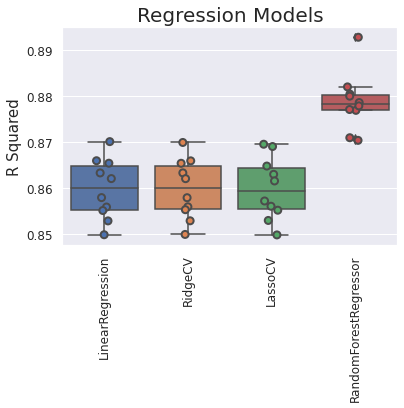

In [11]:
sns.set(color_codes=True)
sns.boxplot(x="model_name", y="r2", data=cv_df)
sns.stripplot(x="model_name", y="r2", data=cv_df, size = 7, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Regression Models", fontsize=20)
plt.ylabel("R Squared", fontsize = 15)
plt.xlabel("")
plt.xticks(fontsize = 12, rotation=90)
plt.yticks(fontsize = 12, rotation = 0)
plt.show()

In [12]:
cv_df.head(5)

,model_name,fold_idx,r2
0,LinearRegression,0,0.865969
1,LinearRegression,1,0.857969
2,LinearRegression,2,0.863323
3,LinearRegression,3,0.870118
4,LinearRegression,4,0.849908


In [13]:
final_comp = cv_df.groupby("model_name").r2.mean().reset_index().sort_values(by = "r2", ascending = False)
final_comp

,model_name,r2
2,RandomForestRegressor,0.878701
0,LassoCV,0.859946
3,RidgeCV,0.859886
1,LinearRegression,0.859881


In [5]:
from sklearn.model_selection import GridSearchCV

RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [6]:
regressor = RandomForestRegressor(random_state=32)

In [12]:
grid = {
    "n_estimators" : [20, 50, 100, 500],
    "criterion" : ["mse"]
}

In [13]:
#time consuming
grid_apply = GridSearchCV(regressor, grid, scoring = "r2", cv = 5, refit = True, verbose = 2)

In [14]:
#actual time consuming print out...but totally worth it!
grid_apply.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] criterion=mse, n_estimators=20 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... criterion=mse, n_estimators=20, total=   2.5s
[CV] criterion=mse, n_estimators=20 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ................... criterion=mse, n_estimators=20, total=   2.5s
[CV] criterion=mse, n_estimators=20 ..................................
[CV] ................... criterion=mse, n_estimators=20, total=   2.5s
[CV] criterion=mse, n_estimators=20 ..................................
[CV] ................... criterion=mse, n_estimators=20, total=   2.4s
[CV] criterion=mse, n_estimators=20 ..................................
[CV] ................... criterion=mse, n_estimators=20, total=   2.5s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] ................... criterion=mse, n_estimators=50, total=   6.2s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] ................... criterion=mse, n_estimators=50, total=   6.2s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] ................... criterion=mse, n_estimators=50, total=   6.2s
[CV] criterion=mse, n_estimators=50 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=32,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [15]:
best_perf = grid_apply.best_score_

best_model = grid_apply.best_params_

In [16]:
print("Best R Squared =" + " " +str(best_perf))
print(" ")
print("Best Parameters:"+ " " +str(best_model))

Best R Squared = 0.8786563111617296
 
Best Parameters: {'criterion': 'mse', 'n_estimators': 500}
